In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("profiles.csv")

In [3]:
data.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

# THERE ARE NULL VALUES!!!!!!!11

Input variables: age, body_type, diet, drinks, drugs, education, ethnicity, height, job, offspring, orientation, pets, religion, sex, sign, smokes, 

I am not incuding the 'essay' columns, because these are very hard to quantify. I could use text classification to categorize them and quentify them, but that will be for another projects
I am not incuding the 'speaks' column, because there are too many values with too little frequency, which could lead to overfitting.


Target values: Status misschien wel het meest interessante, aangezien dit het doel is van de app. Ongeveer 4,2% van vrouwen is seeing someone en 3,4% van de mannen. 
Zou het nog kunnen uitsplitsen per man/vrouwe

Lets keep it simple and only use 'job', 'age' and 'sex' to predict 'income'.

In [7]:
data.job.value_counts()

job
other                                7589
student                              4882
science / tech / engineering         4848
computer / hardware / software       4709
artistic / musical / writer          4439
sales / marketing / biz dev          4391
medicine / health                    3680
education / academia                 3513
executive / management               2373
banking / financial / real estate    2266
entertainment / media                2250
law / legal services                 1381
hospitality / travel                 1364
construction / craftsmanship         1021
clerical / administrative             805
political / government                708
rather not say                        436
transportation                        366
unemployed                            273
retired                               250
military                              204
Name: count, dtype: int64

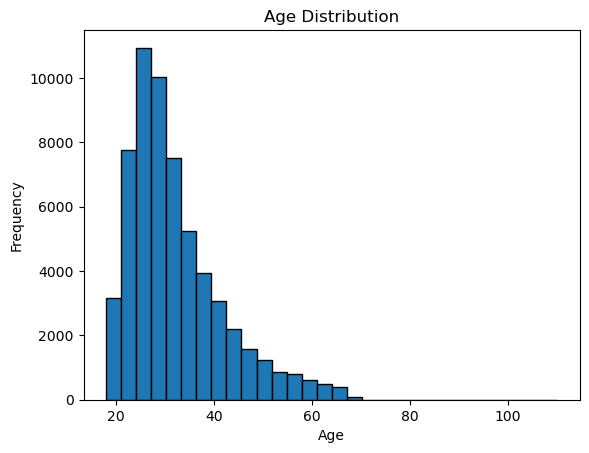

In [8]:
import matplotlib.pyplot as plt

# Plot histogram
data['age'].plot(kind='hist', bins=30, edgecolor='black')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

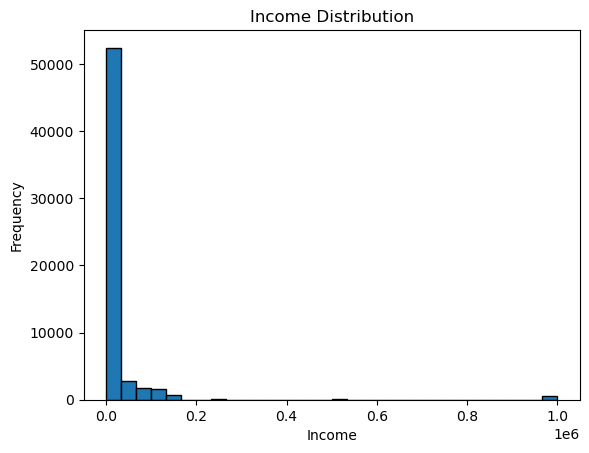

In [9]:
import matplotlib.pyplot as plt

# Plot histogram
data['income'].plot(kind='hist', bins=30, edgecolor='black')

plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

In [10]:
data.income.describe()

count      59946.000000
mean       20033.222534
std        97346.192104
min           -1.000000
25%           -1.000000
50%           -1.000000
75%           -1.000000
max      1000000.000000
Name: income, dtype: float64

In [11]:
income_above_0 = data[data['income'] > 0 ]
len(income_above_0)

11504

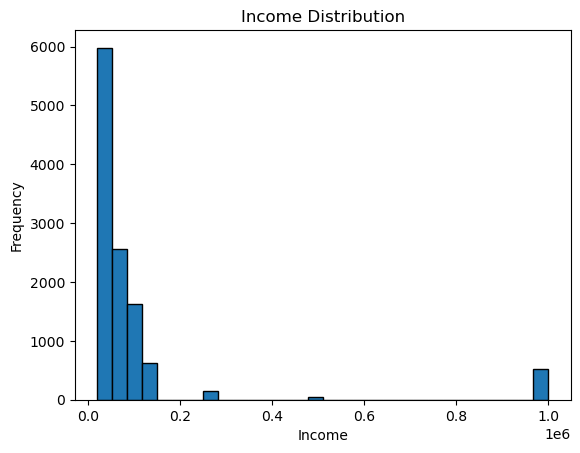

In [12]:
import matplotlib.pyplot as plt

# Plot histogram
income_above_0['income'].plot(kind='hist', bins=30, edgecolor='black')

plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

In [13]:
income_above_0['income'].sort_values()

29773      20000
50068      20000
50037      20000
50018      20000
50001      20000
          ...   
29935    1000000
18588    1000000
18593    1000000
15052    1000000
32080    1000000
Name: income, Length: 11504, dtype: int64

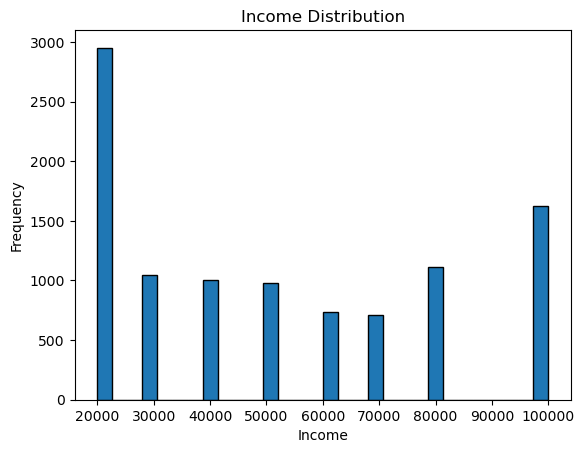

In [14]:
income_above_0_below_150k = income_above_0[income_above_0['income'] < 150000]
# Plot histogram
income_above_0_below_150k['income'].plot(kind='hist', bins=30, edgecolor='black')

plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

In [15]:
income_above_0_below_150k['income'].describe()

count     10155.000000
mean      51606.105367
std       29033.245262
min       20000.000000
25%       20000.000000
50%       50000.000000
75%       80000.000000
max      100000.000000
Name: income, dtype: float64

Lets keep it simple and only use 'job', 'age' and 'sex' to predict 'income'.

## Predicting income by using nn regression and linear regression

In [18]:
data_select = income_above_0_below_150k[['job', 'age', 'sex', 'income', 'smokes', 'offspring', 'body_type', 'diet','drugs', 'drinks','education']]

data_select = pd.get_dummies(
    data_select,
    columns = ['job', 'sex', 'smokes', 'offspring', 'body_type', 'diet', 'drugs','drinks', 'education'], # I could manually code the values for drink and drug frequency
    dtype = int
)




In [19]:
# Calculate correlation matrix for all columns
corr_matrix = data_select.corr()

# Extract correlations of all features with the target column
corr_with_target = corr_matrix['income'].drop('income')  # drop self-correlation

# Sort correlations by absolute value descending
corr_with_target_sorted = corr_with_target.abs().sort_values(ascending=False)

print(corr_with_target_sorted.head(20))
print(corr_with_target_sorted.tail(20))

age                                            0.363489
job_student                                    0.315614
education_working on college/university        0.298840
job_computer / hardware / software             0.278501
education_graduated from masters program       0.247680
job_science / tech / engineering               0.221980
education_graduated from college/university    0.211110
smokes_no                                      0.179141
education_working on two-year college          0.171890
job_other                                      0.158844
drugs_sometimes                                0.156068
smokes_yes                                     0.148266
job_executive / management                     0.147834
sex_f                                          0.144300
sex_m                                          0.144300
body_type_athletic                             0.140668
education_graduated from high school           0.139140
body_type_fit                                  0

In [20]:
X_col_list = [col for col in data_select.columns if col != 'income']
y_col_list = ['income']

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = data_select[X_col_list]
y_scaled = scaler.fit_transform(data_select[y_col_list])

In [22]:
#Creating tensors
import torch
X_tensor = torch.tensor(X.values, dtype = torch.float)
y_tensor = torch.tensor(y_scaled, dtype = torch.float)

In [23]:
#Splitting data
from sklearn.model_selection import train_test_split
X_tensor_train, X_tensor_test, y_tensor_train, y_tensor_test = train_test_split(X_tensor, y_tensor, test_size = 0.2)

In [24]:
X_tensor_train.shape

torch.Size([8124, 114])

In [25]:
X_tensor_test.shape

torch.Size([2031, 114])

In [26]:
y_tensor_train.shape

torch.Size([8124, 1])

In [27]:
y_tensor_test.shape

torch.Size([2031, 1])

In [28]:
from torch import nn
nn_regmodel = nn.Sequential(
    nn.Linear(114,114),
    nn.ReLU(),
    nn.Linear(114,48),
    nn.ReLU(),
    nn.Linear(48,24),
    nn.ReLU(),
    nn.Linear(24,1)
)

In [29]:
import torch.optim as optim
from torch.nn import MSELoss
from sklearn.metrics import accuracy_score, recall_score, precision_score
import torch.optim as optim

loss = MSELoss()
optimizer = optim.Adam(nn_regmodel.parameters(), lr= 0.08)

num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    predictions = nn_regmodel(X_tensor_train)
    MSE = loss(predictions, y_tensor_train)
    

    MSE.backward()
    optimizer.step()

     
    if (epoch + 1) % 100 == 0:

        print(f'Epoch [{epoch+1}/{num_epochs}], MSELoss: {MSE.item():.4f}')




Epoch [100/1000], MSELoss: 1.0019
Epoch [200/1000], MSELoss: 1.0019
Epoch [300/1000], MSELoss: 1.0019
Epoch [400/1000], MSELoss: 1.0019
Epoch [500/1000], MSELoss: 1.0019
Epoch [600/1000], MSELoss: 1.0019
Epoch [700/1000], MSELoss: 1.0019
Epoch [800/1000], MSELoss: 1.0019
Epoch [900/1000], MSELoss: 1.0019
Epoch [1000/1000], MSELoss: 1.0019


In [30]:
predictions = nn_regmodel(X_tensor_train)
loss = MSELoss()
mse = loss(predictions, y_tensor_train)
rmse = torch.sqrt(mse)
print(rmse)

tensor(1.0010, grad_fn=<SqrtBackward0>)


In [31]:
nn_reg_model = nn.Sequential(
    nn.Linear(114, 114),
    nn.ReLU(),
    nn.Linear(114,48),
    nn.ReLU(),
    nn.Linear(48,24),
    nn.ReLU(),
    nn.Linear(24,1)
)

loss_fn = nn.L1Loss()  # MAE = Mean Absolute Error
optimizer = optim.Adam(nn_reg_model.parameters(), lr= 0.01)

num_epochs = 100 #DECREASED 
for epoch in range(num_epochs):
    optimizer.zero_grad()
    predictions = nn_reg_model(X_tensor_train)
    MAE = loss_fn(predictions, y_tensor_train)
    

    MAE.backward()
    optimizer.step()

     
    if (epoch + 1) % 1000 == 0:

        print(f'Epoch [{epoch+1}/{num_epochs}], MAELoss: {MAE.item():.4f}')



In [32]:
#torch.save(nn_reg_model, 'nn_regression_y_scaled')

In [33]:
# #Evaluating
# nn_regression_y_scaled = torch.load('nn_regression_y_scaled', weights_only=False)
# MAEloss = nn.L1Loss()
# MSEloss = MSEloss()

# #Calculating the Mean Average Error
# nn_regression_y_scaled.eval()
# with torch.no_grad():
#     predictions = nn_regression_y_scaled(X_tensor_train)
#     train_MAE = MAEloss(predictions, y_tensor_train)

# nn_regression_y_scaled.eval()
# with torch.no_grad():
#     predictions = nn_regression_y_scaled(X_tensor_train)
#     train_MSE = MSEloss(predictions, y_tensor_train)


# ### What does this do really????
# import math
# train_MSE # = 896,490,000
# train_RMSE = math.sqrt(test_MSE) #  29,941.460752608582

# print(train_MSE)
# print(train_MAE)

In [34]:
#Evaluating
nn_regression_y_scaled = torch.load('nn_regression_y_scaled', weights_only=False)
MAEloss = nn.L1Loss()
MSEloss = MSELoss()

#Calculating the Mean Average Error
nn_regression_y_scaled.eval()
with torch.no_grad():
    predictions = nn_regression_y_scaled(X_tensor_test)
    test_MAE = MAEloss(predictions, y_tensor_test)

#Calculating the Mean Squared Error
nn_regression_y_scaled.eval()
with torch.no_grad():
    predictions = nn_regression_y_scaled(X_tensor_test)
    test_MSE = MSEloss(predictions, y_tensor_test)

#Taking the root for interpretability
import math
test_RMSE = math.sqrt(test_MSE) 

print(test_MAE)
print(test_RMSE)

tensor(0.2671)
0.5430083774953112


In [35]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Suppose y is a 1D NumPy array or Series
y = data_select[y_col_list].values.reshape(-1, 1)  # ensure it's 2D

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)  # now scaler_y is fitted!

# Now this will work:
mae_original = 0.6947 * scaler_y.scale_[0]
rmse_original = 0.9789 * scaler_y.scale_[0]

print(f"MAE (original scale): {mae_original:.2f}")
print(f"RMSE (original scale): {rmse_original:.2f}")



MAE (original scale): 20168.40
RMSE (original scale): 28419.24


A mean average loss of 20,168.40 with a data set with the minimum of 20.000 and a maximum of 100.000 isn't that good. I wonder how a simple multiple linear regression would do. 

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X = data_select[X_col_list]
y = data_select[y_col_list]

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2)
lm = LinearRegression()

lm.fit(X_train, y_train)

print(lm.score(X_train, y_train))
print(lm.score(X_test, y_test))

0.4534044764667349
-5.312684880218012e+27


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import numpy as np

X = data_select[X_col_list]
y = data_select[y_col_list]

from sklearn.preprocessing import PolynomialFeatures

#Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2)
lm = LinearRegression()

#Train model
lm.fit(X_train, y_train)

#Make predictions on train data
predictions = lm.predict(X_train)

#Calculate loss on train data
loss_train = mean_absolute_error(y_train, predictions)

#Make predictions on test data
predictions = lm.predict(X_test)

#Calculate loss on test data
loss_test = mean_absolute_error(y_test, predictions)

#print results
print(loss_train)
print(loss_test)
print(lm.score(X_train, y_train))
print(lm.score(X_test, y_test))

16092.617535708849
16517.16949420702
0.5087327715870946
0.4858862910690105


# Predicting smokers non-smokers 

I assign all the smoker values, from 'yes' (I smoke) to 'when drinking' to '1' and the non-smoker value 'no' to 'o'

In [242]:
data_select = income_above_0_below_150k[['job', 'age', 'sex', 'income', 'smokes', 'offspring', 'body_type', 'diet','drugs', 'drinks','education']]

data_select = pd.get_dummies(
    data_select,
    columns = ['job', 'sex', 'income', 'offspring', 'body_type', 'diet','drugs', 'drinks','education'], # I could manually code the values for drink and drug frequency
    dtype = int
)
data_select['smokes'] = data_select['smokes'].replace({'yes': 1, 'trying to quit':1, 'sometimes': 1, 'when drinking': 1, 'no':0})

C:\Users\Frank\AppData\Local\Temp\ipykernel_3508\750655858.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_select['smokes'] = data_select['smokes'].replace({'yes': 1, 'trying to quit':1, 'sometimes': 1, 'when drinking': 1, 'no':0})


In [243]:
# data_select['smokes'].value_counts(normalize=True)

In [259]:
X_col_list = [col for col in data_select.columns if col != 'smokes']
y_col_list = ['smokes']

from sklearn.preprocessing import StandardScaler

nn_bin_X = data_select[X_col_list]
nn_bin_y= data_select[y_col_list]

nn_bin_X

,age,job_artistic / musical / writer,job_banking / financial / real estate,job_clerical / administrative,job_computer / hardware / software,job_construction / craftsmanship,job_education / academia,job_entertainment / media,job_executive / management,job_hospitality / travel,...,education_space camp,education_two-year college,education_working on college/university,education_working on high school,education_working on law school,education_working on masters program,education_working on med school,education_working on ph.d program,education_working on space camp,education_working on two-year college
1,35,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
11,28,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,29,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59917,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59927,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59930,41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59934,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [297]:
import torch
X_tensor = torch.tensor(nn_bin_X.values, dtype = torch.float)
y_tensor = torch.tensor(nn_bin_y.values, dtype = torch.float)

In [357]:
from sklearn.model_selection import train_test_split
nn_bin_X_train, nn_bin_X_test, nn_bin_y_train, nn_bin_y_test = train_test_split(X_tensor, y_tensor, test_size = 0.2)

In [358]:
nn_bin_y.shape

(10155, 1)

In [359]:
X_tensor = torch.tensor(nn_bin_X.values, dtype = torch.float)
nn_bin_X.shape

(10155, 117)

In [360]:
nn_bin_classifier = nn.Sequential(
    nn.Linear(117,117),
    nn.ReLU(),
    nn.Linear(117,58),
    nn.ReLU(),
    nn.Linear(58,1)
)

In [361]:
print("NaNs in inputs:", torch.isnan(nn_bin_X_train).any().item())
print("Infs in inputs:", torch.isinf(nn_bin_X_train).any().item())
print("NaNs in targets:", torch.isnan(nn_bin_y_train).any().item())
print("Infs in targets:", torch.isinf(nn_bin_y_train).any().item())


NaNs in inputs: False
Infs in inputs: False
NaNs in targets: True
Infs in targets: False


In [362]:
nn_bin_X_train.shape

torch.Size([8124, 117])

In [363]:
print(nn_bin_X_train.shape)  # Should be (2031, 117)
print(nn_bin_X_test.shape)  # Should be (2031, 117)


torch.Size([8124, 117])
torch.Size([2031, 117])


In [364]:
# import torch.optim as optim
# import torch.nn as nn

# mask = ~torch.isnan(nn_bin_y_train).squeeze()
# nn_bin_y_train = nn_bin_y_train[mask]
# nn_bin_X_train = nn_bin_X_train[mask]  


# loss_fn = torch.nn.BCEWithLogitsLoss()
# optimizer = optim.SGD(nn_bin_classifier.parameters(), lr=0.001)

# num_epochs = 3000
# for epoch in range(num_epochs):
#     optimizer.zero_grad()

#     # Forward pass
#     predictions = nn_bin_classifier(nn_bin_X_train)

#     # Compute loss
#     loss = loss_fn(predictions, nn_bin_y_train)

#     # Backpropagation
#     loss.backward()
#     optimizer.step()

#     # Print loss every 100 epochs
#     if (epoch + 1) % 100 == 0:
#         print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

In [365]:
torch.save(nn_bin_classifier, 'nn_bin_classifier')

In [379]:
# Set model to eval mode
nn_bin_classifier.eval()

with torch.no_grad():
    y_logits = nn_bin_classifier(nn_bin_X_test)
    y_probs = torch.sigmoid(y_logits)              # Convert logits to probabilities
    y_pred = (y_probs >= 0.5).float()               # Convert to binary labels (0 or 1)



In [403]:
mask = ~torch.isnan(nn_bin_y_test).squeeze()
nn_bin_y_test = nn_bin_y_test[mask]


In [401]:
y_true = nn_bin_y_test.cpu().numpy()
y_pred = y_pred.cpu().numpy()


AttributeError: 'numpy.ndarray' object has no attribute 'cpu'

In [405]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, zero_division=0)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy:  {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall:    {rec:.3f}")
print(f"F1 Score:  {f1:.3f}")


ValueError: Found input variables with inconsistent numbers of samples: [1930, 2031]